# 1、导入数据

In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

data_order = pd.read_csv('t_order.csv')
data_ads = pd.read_csv('t_ads.csv')
data_comment = pd.read_csv('t_comment.csv')
data_product = pd.read_csv('t_product.csv', low_memory=False)
data_sales_sum = pd.read_csv('t_sales_sum.csv')

# 2、探索数据

## 2.1 查看商家数

In [4]:
shops_order = data_order[['shop_id']].drop_duplicates()
print('num of shop_order csv: {}'.format(len(shops_order)))

shops_ads = data_ads[['shop_id']].drop_duplicates()
print('num of shop_ads csv: {}'.format(len(shops_ads)))

shops_comment = data_comment[['shop_id']].drop_duplicates()
print('num of shop_comment csv: {}'.format(len(shops_comment)))

shops_product = data_product[['shop_id']].drop_duplicates()
print('num of shop_product csv: {}'.format(len(shops_product)))

shops_sales_sum = data_sales_sum[['shop_id']].drop_duplicates()
print('num of shop_sales_sum csv: {}'.format(len(shops_sales_sum)))

num of shop_order csv: 3000
num of shop_ads csv: 1951
num of shop_comment csv: 3000
num of shop_product csv: 2886
num of shop_sales_sum csv: 3000


In [5]:
shops = shops_order.sort_values(by='shop_id').reset_index(drop=True)
shops

,shop_id
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


## 2.2 查看样本日期范围

In [4]:
dt_sales_sum = data_sales_sum[['dt']].drop_duplicates().sort_values(by='dt').reset_index(drop=True)
print(dt_sales_sum)
print(len(data_sales_sum))
print(data_sales_sum['shop_id'].value_counts())

           dt
0  2016-06-30
1  2016-07-31
2  2016-08-31
3  2016-09-30
4  2016-10-31
5  2016-11-30
6  2016-12-31
7  2017-01-31
24030
2205    37
2129     9
2500     8
517      8
2564     8
501      8
2548     8
485      8
2532     8
469      8
2516     8
453      8
437      8
533      8
2484     8
421      8
2468     8
405      8
2452     8
389      8
2436     8
373      8
2420     8
2580     8
2047     8
2404     8
629      8
2756     8
693      8
2740     8
        ..
2827     8
778      8
2811     8
762      8
2795     8
746      8
2939     8
2955     8
1210     8
922      8
1194     8
1178     8
1162     8
1146     8
1130     8
1114     8
1098     8
1082     8
1066     8
1050     8
1034     8
1018     8
1002     8
986      8
970      8
954      8
2987     8
938      8
2971     8
2049     8
Name: shop_id, Length: 3000, dtype: int64


In [5]:
print(len(data_sales_sum[data_sales_sum['shop_id']==2205].drop_duplicates()))
print(len(data_sales_sum[data_sales_sum['shop_id']==2129].drop_duplicates()))

8
8


In [6]:
data_order = data_order.drop_duplicates()
data_ads = data_ads.drop_duplicates()
data_comment = data_comment.drop_duplicates()
data_product = data_product.drop_duplicates()
data_sales_sum = data_sales_sum.drop_duplicates()

In [7]:
data_order_time = data_order[['ord_dt']].drop_duplicates().sort_values(by='ord_dt').reset_index(drop=True)
data_order_time

,ord_dt
0,2016-08-03
1,2016-08-04
2,2016-08-05
3,2016-08-06
4,2016-08-07
5,2016-08-08
6,2016-08-09
7,2016-08-10
8,2016-08-11
9,2016-08-12


可以看出，order数据集一共给出了2016-08-03~2017-04-30共271天，9个月的数据。考虑到样本给出了2016.06.30-2017.01.31的8次预测值。选择利用‘8月+9月’的订单等信息来训练2016.09.30后90天的销售额，‘9月+10月’的订单等信息来训练2016.10.31后90天的销售额，以此类推，至‘12月+1月’的订单等信息来训练2017.01.31后90天的销售额。共5个时间段，选取前四个作为train test，最后一个最为validation test。**最后利用‘3月+4月’的订单等信息来预测2017.04.30后90天的销售额。**

# 3、整理数据

## 3.1 '8+9'-9阶段

###  3.1.1订单类features

In [8]:
data_order_1_ = data_order[data_order['ord_dt'] <= '2016-09-30']
data_order_1 = data_order_1_[data_order_1_['ord_dt'] >= '2016-08-01']
features_train_1_order = pd.DataFrame()
features_train_1_order['shop_id'] = shops['shop_id']

# start = time()
# ord_cnt = []
# sale_amt = []
# offer_cnt = []
# offer_amt = []
# rtn_cnt = []
# rtn_amt = []
# user_cnt = []
# for i in range(1,3001):
#     ord_cnt.append(data_order_1[data_order_1['shop_id'] == i]['ord_cnt'].sum())
#     sale_amt.append(data_order_1[data_order_1['shop_id'] == i]['sale_amt'].sum())
#     offer_cnt.append(data_order_1[data_order_1['shop_id'] == i]['offer_cnt'].sum())
#     offer_amt.append(data_order_1[data_order_1['shop_id'] == i]['offer_amt'].sum())
#     rtn_cnt.append(data_order_1[data_order_1['shop_id'] == i]['rtn_cnt'].sum())
#     rtn_amt.append(data_order_1[data_order_1['shop_id'] == i]['rtn_amt'].sum())
#     user_cnt.append(data_order_1[data_order_1['shop_id'] == i]['user_cnt'].sum())
# features_train_1_order['ord_cnt'] = pd.Series(ord_cnt)
# features_train_1_order['sale_amt'] = pd.Series(sale_amt)
# features_train_1_order['offer_cnt'] = pd.Series(offer_cnt)
# features_train_1_order['offer_amt'] = pd.Series(offer_amt)
# features_train_1_order['rtn_cnt'] = pd.Series(rtn_cnt)
# features_train_1_order['rtn_amt'] = pd.Series(rtn_amt)
# features_train_1_order['user_cnt'] = pd.Series(user_cnt)
# end = time()
# print('手动循环统计时间：{:.2f}s'.format(end-start))    #109.03s
# features_train_1_order

start = time()
order_1_ord_cnt = data_order_1[['ord_cnt']].groupby(data_order_1['shop_id']).sum().reset_index()
features_train_1_order = features_train_1_order.merge(order_1_ord_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_1_sale_amt = data_order_1[['sale_amt']].groupby(data_order_1['shop_id']).sum().reset_index()
features_train_1_order = features_train_1_order.merge(order_1_sale_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_1_offer_cnt = data_order_1[['offer_cnt']].groupby(data_order_1['shop_id']).sum().reset_index()
features_train_1_order = features_train_1_order.merge(order_1_offer_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_1_offer_amt = data_order_1[['offer_amt']].groupby(data_order_1['shop_id']).sum().reset_index()
features_train_1_order = features_train_1_order.merge(order_1_offer_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_1_rtn_cnt = data_order_1[['rtn_cnt']].groupby(data_order_1['shop_id']).sum().reset_index()
features_train_1_order = features_train_1_order.merge(order_1_rtn_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_1_rtn_amt = data_order_1[['rtn_amt']].groupby(data_order_1['shop_id']).sum().reset_index()
features_train_1_order = features_train_1_order.merge(order_1_rtn_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_1_user_cnt = data_order_1[['user_cnt']].groupby(data_order_1['shop_id']).sum().reset_index()
features_train_1_order = features_train_1_order.merge(order_1_user_cnt,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)
end = time()
print('groupby+merge时间：{:.2f}s'.format(end-start))   #0.62s
features_train_1_order

groupby+merge时间：0.69s


,shop_id,ord_cnt,sale_amt,offer_cnt,offer_amt,rtn_cnt,rtn_amt,user_cnt
0,1,696,80914.18,242,3902.58,24,1295.22,696
1,2,505,50658.45,170,643.53,31,1487.70,504
2,3,507,70524.12,390,5277.69,20,1469.31,507
3,4,906,101042.17,484,494.81,2,98.59,906
4,5,1726,97782.52,1696,109022.87,9,709.15,1726
5,6,3523,127488.04,1252,72803.91,17,635.98,3522
6,7,2093,134035.19,2007,40109.65,18,515.73,2087
7,8,1320,157292.95,1014,3793.25,18,1002.85,1320
8,9,3413,159075.84,956,6461.44,110,1973.73,3406
9,10,51,8721.92,16,91.33,4,340.65,51


### 3.1.2 广告类features

In [9]:
data_ads_1_ = data_ads[data_ads['create_dt'] <= '2016-09-30']
data_ads_1 = data_ads_1_[data_ads_1_['create_dt'] >= '2016-08-01']
features_train_1_ads = pd.DataFrame()
features_train_1_ads['shop_id'] = shops['shop_id']
# charge = []
# consume = []
# for i in range(1,3001):
#     charge.append(data_ads_1[data_ads_1['shop_id'] == i]['charge'].sum())
#     consume.append(data_ads_1[data_ads_1['shop_id'] == i]['consume'].sum())
# features_train_1_ads['charge'] = pd.Series(charge)
# features_train_1_ads['consume'] = pd.Series(consume)
# features_train_1_ads.fillna(0)

ads_1_charge = data_ads_1[['charge']].groupby(data_ads_1['shop_id']).sum().reset_index()
features_train_1_ads = features_train_1_ads.merge(ads_1_charge,left_on='shop_id', right_on='shop_id', how='outer')

ads_1_consume = data_ads_1[['consume']].groupby(data_ads_1['shop_id']).sum().reset_index()
features_train_1_ads = features_train_1_ads.merge(ads_1_consume,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)
features_train_1_ads

,shop_id,charge,consume
0,1,95795.81,101653.74
1,2,0.00,0.00
2,3,956008.31,139555.00
3,4,0.00,11909.29
4,5,0.00,0.00
5,6,545933.09,507187.47
6,7,0.00,0.00
7,8,1704891.29,1245641.84
8,9,0.00,0.00
9,10,56653.43,42257.32


### 3.1.3 评论类features

In [10]:
data_comment_1_ = data_comment[data_comment['create_dt'] <= '2016-09-30']
data_comment_1 = data_comment_1_[data_comment_1_['create_dt'] >= '2016-08-01']
features_train_1_comment = pd.DataFrame()
features_train_1_comment['shop_id'] = shops['shop_id']
# cmmt_num = []
# bad_num = []
# mid_num = []
# good_num = []
# dis_num = []
# for i in range(1,3001):
#     cmmt_num.append(data_comment_1[data_comment_1['shop_id'] == i]['cmmt_num'].sum())
#     bad_num.append(data_comment_1[data_comment_1['shop_id'] == i]['bad_num'].sum())
#     mid_num.append(data_comment_1[data_comment_1['shop_id'] == i]['mid_num'].sum())
#     good_num.append(data_comment_1[data_comment_1['shop_id'] == i]['good_num'].sum())
#     dis_num.append(data_comment_1[data_comment_1['shop_id'] == i]['dis_num'].sum())
# features_train_1_comment['cmmt_num'] = pd.Series(cmmt_num)
# features_train_1_comment['bad_num'] = pd.Series(bad_num)
# features_train_1_comment['mid_num'] = pd.Series(mid_num)
# features_train_1_comment['good_num'] = pd.Series(good_num)
# features_train_1_comment['dis_num'] = pd.Series(dis_num)
# features_train_1_comment

comment_1_cmmt_num = data_comment_1[['cmmt_num']].groupby(data_comment_1['shop_id']).sum().reset_index()
features_train_1_comment = features_train_1_comment.merge(comment_1_cmmt_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_1_bad_num = data_comment_1[['bad_num']].groupby(data_comment_1['shop_id']).sum().reset_index()
features_train_1_comment = features_train_1_comment.merge(comment_1_bad_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_1_mid_num = data_comment_1[['mid_num']].groupby(data_comment_1['shop_id']).sum().reset_index()
features_train_1_comment = features_train_1_comment.merge(comment_1_mid_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_1_good_num = data_comment_1[['good_num']].groupby(data_comment_1['shop_id']).sum().reset_index()
features_train_1_comment = features_train_1_comment.merge(comment_1_good_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_1_dis_num = data_comment_1[['dis_num']].groupby(data_comment_1['shop_id']).sum().reset_index()
features_train_1_comment = features_train_1_comment.merge(comment_1_dis_num,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)
features_train_1_comment

,shop_id,cmmt_num,bad_num,mid_num,good_num,dis_num
0,1,434.0,0.0,1.0,433.0,20.0
1,2,47.0,3.0,5.0,39.0,4.0
2,3,108.0,5.0,1.0,102.0,13.0
3,4,351.0,7.0,1.0,343.0,4.0
4,5,35200.0,0.0,1.0,35199.0,1.0
5,6,11402.0,18.0,92.0,11292.0,115.0
6,7,1072.0,4.0,10.0,1058.0,18.0
7,8,541.0,3.0,10.0,528.0,58.0
8,9,4156.0,10.0,36.0,4110.0,34.0
9,10,13.0,1.0,0.0,12.0,1.0


### 3.1.4 商品类features

In [11]:
data_product_off_dt = data_product['off_dt'].dropna()
print('下架时间种类数：{} '.format(len(data_product_off_dt.drop_duplicates())))
print(data_product_off_dt)

下架时间种类数：1 
55007       2017-05-01
55008       2017-05-01
137440      2017-05-01
281609      2017-05-01
299643      2017-05-01
299644      2017-05-01
299645      2017-05-01
299646      2017-05-01
299647      2017-05-01
299648      2017-05-01
327407      2017-05-01
327408      2017-05-01
327680      2017-05-01
334682      2017-05-01
334683      2017-05-01
334684      2017-05-01
336295      2017-05-01
336296      2017-05-01
336349      2017-05-01
336350      2017-05-01
336354      2017-05-01
336744      2017-05-01
336755      2017-05-01
336756      2017-05-01
336757      2017-05-01
336758      2017-05-01
337261      2017-05-01
337521      2017-05-01
337532      2017-05-01
337533      2017-05-01
               ...    
11328387    2017-05-01
11328388    2017-05-01
11328389    2017-05-01
11328390    2017-05-01
11328391    2017-05-01
11328392    2017-05-01
11328393    2017-05-01
11328394    2017-05-01
11328395    2017-05-01
11328396    2017-05-01
11328397    2017-05-01
11328398    2017-05-01


In [9]:
brands = data_product[['brand']].drop_duplicates()
cates = data_product[['cate']].drop_duplicates()
print('num of brands:{}'.format(len(brands)))
print('num of cates:{}'.format(len(cates)))
brands.sort_values(by='brand')
cates.sort_values(by='cate')

num of brands:3089
num of cates:310


,cate
1336,1
854074,2
11182,3
679525,4
14107,5
132535,6
916,7
99345,8
7432,9
3065,10


In [10]:
start = time()
brand = pd.DataFrame()
brand['shop_id'] = shops['shop_id']
for i in range(1, len(brands)+1):
    brand['brand_{}'.format(i)] = 0
for j in range(1,len(brands)+1):
    brand_list = list(data_product[data_product['shop_id']==j]['brand'])
    for i in set(brand_list):
        brand['brand_{}'.format(i)][j-1] = brand_list.count(i)
end = time()
print('brand特征建立时间：{:.2f}s'.format(end-start)) #55.28s
brand

brand特征建立时间：58.80s


,shop_id,brand_1,brand_2,brand_3,brand_4,brand_5,brand_6,brand_7,brand_8,brand_9,...,brand_3080,brand_3081,brand_3082,brand_3083,brand_3084,brand_3085,brand_3086,brand_3087,brand_3088,brand_3089
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
start = time()
cate = pd.DataFrame()
cate['shop_id'] = shops['shop_id']
for i in range(1, len(cates)+1):
    cate['cate_{}'.format(i)] = 0
for j in range(1,len(cates)+1):
    cate_list = list(data_product[data_product['shop_id']==j]['cate'])
    for i in set(cate_list):
        cate['cate_{}'.format(i)][j-1] = cate_list.count(i)
end = time()
print('cate特征建立时间：{:.2f}s'.format(end-start)) #7.08s
cate

cate特征建立时间：5.30s


,shop_id,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,cate_7,cate_8,cate_9,...,cate_301,cate_302,cate_303,cate_304,cate_305,cate_306,cate_307,cate_308,cate_309,cate_310
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,0,0,0,0,0,0,0,0,0,...,0,36,0,0,342,0,0,0,0,0


**合并features**,再建立90天**销售额labels**

In [15]:
features_train_1 = features_train_1_order.merge(features_train_1_ads, left_on='shop_id', right_on='shop_id', how='outer')
features_train_1_0 = features_train_1.merge(features_train_1_comment, left_on='shop_id', right_on='shop_id', how='outer')
features_train_1 = features_train_1_0.merge(brand, left_on='shop_id', right_on='shop_id', how='outer')
features_train_1 = features_train_1.merge(cate, left_on='shop_id', right_on='shop_id', how='outer')
features_train_1.head()
# features_train_1.to_csv('features_1.csv')
# features_train_1_0.to_csv('features_1_0.csv')

,shop_id,ord_cnt,sale_amt,offer_cnt,offer_amt,rtn_cnt,rtn_amt,user_cnt,charge,consume,...,cate_301,cate_302,cate_303,cate_304,cate_305,cate_306,cate_307,cate_308,cate_309,cate_310
0,1,696,80914.18,242,3902.58,24,1295.22,696,95795.81,101653.74,...,0,0,0,0,0,0,0,0,0,0
1,2,505,50658.45,170,643.53,31,1487.70,504,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
2,3,507,70524.12,390,5277.69,20,1469.31,507,956008.31,139555.00,...,0,0,0,0,0,0,0,0,0,0
3,4,906,101042.17,484,494.81,2,98.59,906,0.00,11909.29,...,0,0,0,0,0,0,0,0,0,0
4,5,1726,97782.52,1696,109022.87,9,709.15,1726,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0


建立90天**销售额labels**

In [16]:
data_sales_sum_1 = data_sales_sum[data_sales_sum['dt'] == '2016-09-30']
# sale_amt_3m = []
# for i in range(1,3001):
#     sale_amt_3m.append(data_sales_sum_1[data_sales_sum_1['shop_id'] == i]['sale_amt_3m'].sum())
# labels_train_1 = pd.Series(sale_amt_3m)
# labels_train_1

labels_train_1 = data_sales_sum_1[['sale_amt_3m']].groupby(data_sales_sum_1['shop_id']).sum().reset_index()['sale_amt_3m']
labels_train_1 

0       404198.61
1       144865.94
2       272725.95
3        61281.42
4       137437.72
5       234260.20
6       264040.95
7       123871.31
8       398272.43
9        15691.50
10      322349.67
11      433233.83
12       70635.22
13      109724.77
14      101472.23
15      230117.65
16      528413.11
17       27794.22
18       86768.31
19      121974.67
20       69069.68
21      170738.32
22      248839.82
23      249842.95
24       69796.06
25      303429.02
26       58926.87
27      700383.07
28      390247.16
29       56401.19
          ...    
2970    470938.72
2971    191084.02
2972    301326.97
2973    228378.67
2974    444363.30
2975    174986.87
2976     29047.19
2977    110405.43
2978    257045.77
2979     51395.89
2980     28092.64
2981    582546.79
2982     87066.42
2983     63520.38
2984    159658.41
2985     40390.94
2986     28739.94
2987     86155.35
2988    355691.17
2989     99510.01
2990     19506.91
2991    230390.22
2992     77170.19
2993     21363.95
2994    78

## 3.2 '9+10'-10

### 3.2.1 features

In [17]:
start = time()
# order
data_order_2_ = data_order[data_order['ord_dt'] <= '2016-10-31']
data_order_2 = data_order_2_[data_order_2_['ord_dt'] >= '2016-09-01']
features_2_order = pd.DataFrame()
features_2_order['shop_id'] = shops['shop_id']

order_2_ord_cnt = data_order_2[['ord_cnt']].groupby(data_order_2['shop_id']).sum().reset_index()
features_2_order = features_2_order.merge(order_2_ord_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_2_sale_amt = data_order_2[['sale_amt']].groupby(data_order_2['shop_id']).sum().reset_index()
features_2_order = features_2_order.merge(order_2_sale_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_2_offer_cnt = data_order_2[['offer_cnt']].groupby(data_order_2['shop_id']).sum().reset_index()
features_2_order = features_2_order.merge(order_2_offer_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_2_offer_amt = data_order_2[['offer_amt']].groupby(data_order_2['shop_id']).sum().reset_index()
features_2_order = features_2_order.merge(order_2_offer_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_2_rtn_cnt = data_order_2[['rtn_cnt']].groupby(data_order_2['shop_id']).sum().reset_index()
features_2_order = features_2_order.merge(order_2_rtn_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_2_rtn_amt = data_order_2[['rtn_amt']].groupby(data_order_2['shop_id']).sum().reset_index()
features_2_order = features_2_order.merge(order_2_rtn_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_2_user_cnt = data_order_2[['user_cnt']].groupby(data_order_2['shop_id']).sum().reset_index()
features_2_order = features_2_order.merge(order_2_user_cnt,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# ads
data_ads_2_ = data_ads[data_ads['create_dt'] <= '2016-10-31']
data_ads_2 = data_ads_2_[data_ads_2_['create_dt'] >= '2016-09-01']
features_2_ads = pd.DataFrame()
features_2_ads['shop_id'] = shops['shop_id']

ads_2_charge = data_ads_2[['charge']].groupby(data_ads_2['shop_id']).sum().reset_index()
features_2_ads = features_2_ads.merge(ads_2_charge,left_on='shop_id', right_on='shop_id', how='outer')

ads_2_consume = data_ads_2[['consume']].groupby(data_ads_2['shop_id']).sum().reset_index()
features_2_ads = features_2_ads.merge(ads_2_consume,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# comments
data_comment_2_ = data_comment[data_comment['create_dt'] <= '2016-10-31']
data_comment_2 = data_comment_2_[data_comment_2_['create_dt'] >= '2016-09-01']
features_2_comment = pd.DataFrame()
features_2_comment['shop_id'] = shops['shop_id']

comment_2_cmmt_num = data_comment_2[['cmmt_num']].groupby(data_comment_2['shop_id']).sum().reset_index()
features_2_comment = features_2_comment.merge(comment_2_cmmt_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_2_bad_num = data_comment_2[['bad_num']].groupby(data_comment_2['shop_id']).sum().reset_index()
features_2_comment = features_2_comment.merge(comment_2_bad_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_2_mid_num = data_comment_2[['mid_num']].groupby(data_comment_2['shop_id']).sum().reset_index()
features_2_comment = features_2_comment.merge(comment_2_mid_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_2_good_num = data_comment_2[['good_num']].groupby(data_comment_2['shop_id']).sum().reset_index()
features_2_comment = features_2_comment.merge(comment_2_good_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_2_dis_num = data_comment_2[['dis_num']].groupby(data_comment_2['shop_id']).sum().reset_index()
features_2_comment = features_2_comment.merge(comment_2_dis_num,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# products , 公用


# 合并features
features_2 = features_2_order.merge(features_2_ads, left_on='shop_id', right_on='shop_id', how='outer')
features_2_0 = features_2.merge(features_2_comment, left_on='shop_id', right_on='shop_id', how='outer')
features_2 = features_2_0.merge(brand, left_on='shop_id', right_on='shop_id', how='outer')
features_2 = features_2.merge(cate, left_on='shop_id', right_on='shop_id', how='outer')

end = time()
print('one period features established time: {:.2f}s'.format(end-start))

start = time()
# features_2.to_csv('features_2.csv')
# features_2_0.to_csv('features_2_0.csv')

end = time()
print('one period features saved time: {:.2f}s'.format(end-start))
features_2.head()

one period features established time: 2.61s
one period features saved time: 0.00s


,shop_id,ord_cnt,sale_amt,offer_cnt,offer_amt,rtn_cnt,rtn_amt,user_cnt,charge,consume,...,cate_301,cate_302,cate_303,cate_304,cate_305,cate_306,cate_307,cate_308,cate_309,cate_310
0,1,1732,201820.87,624,9279.19,55,3375.90,1730,120443.73,126050.53,...,0,0,0,0,0,0,0,0,0,0
1,2,1038,114371.78,603,3081.03,76,3768.03,1035,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
2,3,790,112405.57,645,8415.34,35,2577.34,789,272966.55,68075.60,...,0,0,0,0,0,0,0,0,0,0
3,4,758,90676.47,283,380.90,2,97.12,758,0.00,164150.92,...,0,0,0,0,0,0,0,0,0,0
4,5,1144,137361.34,1129,57323.16,10,857.03,1144,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0


### 3.2.2 labels

In [18]:
data_sales_sum_2 = data_sales_sum[data_sales_sum['dt'] == '2016-10-31']

labels_2 = data_sales_sum_2[['sale_amt_3m']].groupby(data_sales_sum_2['shop_id']).sum().reset_index()['sale_amt_3m']

## 3.3 '10+11'-11

### 3.3.1 features

In [19]:
# order
data_order_3_ = data_order[data_order['ord_dt'] <= '2016-11-30']
data_order_3 = data_order_3_[data_order_3_['ord_dt'] >= '2016-10-01']
features_3_order = pd.DataFrame()
features_3_order['shop_id'] = shops['shop_id']

order_3_ord_cnt = data_order_3[['ord_cnt']].groupby(data_order_3['shop_id']).sum().reset_index()
features_3_order = features_3_order.merge(order_3_ord_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_3_sale_amt = data_order_3[['sale_amt']].groupby(data_order_3['shop_id']).sum().reset_index()
features_3_order = features_3_order.merge(order_3_sale_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_3_offer_cnt = data_order_3[['offer_cnt']].groupby(data_order_3['shop_id']).sum().reset_index()
features_3_order = features_3_order.merge(order_3_offer_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_3_offer_amt = data_order_3[['offer_amt']].groupby(data_order_3['shop_id']).sum().reset_index()
features_3_order = features_3_order.merge(order_3_offer_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_3_rtn_cnt = data_order_3[['rtn_cnt']].groupby(data_order_3['shop_id']).sum().reset_index()
features_3_order = features_3_order.merge(order_3_rtn_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_3_rtn_amt = data_order_3[['rtn_amt']].groupby(data_order_3['shop_id']).sum().reset_index()
features_3_order = features_3_order.merge(order_3_rtn_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_3_user_cnt = data_order_3[['user_cnt']].groupby(data_order_3['shop_id']).sum().reset_index()
features_3_order = features_3_order.merge(order_3_user_cnt,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# ads
data_ads_3_ = data_ads[data_ads['create_dt'] <= '2016-11-30']
data_ads_3 = data_ads_3_[data_ads_3_['create_dt'] >= '2016-10-01']
features_3_ads = pd.DataFrame()
features_3_ads['shop_id'] = shops['shop_id']

ads_3_charge = data_ads_3[['charge']].groupby(data_ads_3['shop_id']).sum().reset_index()
features_3_ads = features_3_ads.merge(ads_3_charge,left_on='shop_id', right_on='shop_id', how='outer')

ads_3_consume = data_ads_3[['consume']].groupby(data_ads_3['shop_id']).sum().reset_index()
features_3_ads = features_3_ads.merge(ads_3_consume,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# comments
data_comment_3_ = data_comment[data_comment['create_dt'] <= '2016-11-30']
data_comment_3 = data_comment_3_[data_comment_3_['create_dt'] >= '2016-10-01']
features_3_comment = pd.DataFrame()
features_3_comment['shop_id'] = shops['shop_id']

comment_3_cmmt_num = data_comment_3[['cmmt_num']].groupby(data_comment_3['shop_id']).sum().reset_index()
features_3_comment = features_3_comment.merge(comment_3_cmmt_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_3_bad_num = data_comment_3[['bad_num']].groupby(data_comment_3['shop_id']).sum().reset_index()
features_3_comment = features_3_comment.merge(comment_3_bad_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_3_mid_num = data_comment_3[['mid_num']].groupby(data_comment_3['shop_id']).sum().reset_index()
features_3_comment = features_3_comment.merge(comment_3_mid_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_3_good_num = data_comment_3[['good_num']].groupby(data_comment_3['shop_id']).sum().reset_index()
features_3_comment = features_3_comment.merge(comment_3_good_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_3_dis_num = data_comment_3[['dis_num']].groupby(data_comment_3['shop_id']).sum().reset_index()
features_3_comment = features_3_comment.merge(comment_3_dis_num,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# products , 公用


# 合并features
features_3 = features_3_order.merge(features_3_ads, left_on='shop_id', right_on='shop_id', how='outer')
features_3_0 = features_3.merge(features_3_comment, left_on='shop_id', right_on='shop_id', how='outer')
features_3 = features_3_0.merge(brand, left_on='shop_id', right_on='shop_id', how='outer')
features_3 = features_3.merge(cate, left_on='shop_id', right_on='shop_id', how='outer')
features_3.head()
# features_3.to_csv('features_3.csv')
# features_3_0.to_csv('features_3_0.csv')

,shop_id,ord_cnt,sale_amt,offer_cnt,offer_amt,rtn_cnt,rtn_amt,user_cnt,charge,consume,...,cate_301,cate_302,cate_303,cate_304,cate_305,cate_306,cate_307,cate_308,cate_309,cate_310
0,1,2518,295897.39,1112,14581.59,87,5175.24,2512,24647.92,24396.79,...,0,0,0,0,0,0,0,0,0,0
1,2,1284,138355.85,997,5456.56,81,3847.15,1282,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
2,3,1138,171308.32,912,8404.62,50,3536.15,1137,221279.49,120796.88,...,0,0,0,0,0,0,0,0,0,0
3,4,467,56377.56,217,758.32,2,97.12,467,0.00,157827.35,...,0,0,0,0,0,0,0,0,0,0
4,5,655,131346.45,653,16982.11,15,1494.02,655,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0


### 3.3.2 labels

In [20]:
data_sales_sum_3 = data_sales_sum[data_sales_sum['dt'] == '2016-11-30']

labels_3 = data_sales_sum_3[['sale_amt_3m']].groupby(data_sales_sum_3['shop_id']).sum().reset_index()['sale_amt_3m']

## 3.4 ‘11+12’-12

In [21]:
# order
data_order_4_ = data_order[data_order['ord_dt'] <= '2016-12-31']
data_order_4 = data_order_4_[data_order_4_['ord_dt'] >= '2016-11-01']
features_4_order = pd.DataFrame()
features_4_order['shop_id'] = shops['shop_id']

order_4_ord_cnt = data_order_4[['ord_cnt']].groupby(data_order_4['shop_id']).sum().reset_index()
features_4_order = features_4_order.merge(order_4_ord_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_4_sale_amt = data_order_4[['sale_amt']].groupby(data_order_4['shop_id']).sum().reset_index()
features_4_order = features_4_order.merge(order_4_sale_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_4_offer_cnt = data_order_4[['offer_cnt']].groupby(data_order_4['shop_id']).sum().reset_index()
features_4_order = features_4_order.merge(order_4_offer_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_4_offer_amt = data_order_4[['offer_amt']].groupby(data_order_4['shop_id']).sum().reset_index()
features_4_order = features_4_order.merge(order_4_offer_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_4_rtn_cnt = data_order_4[['rtn_cnt']].groupby(data_order_4['shop_id']).sum().reset_index()
features_4_order = features_4_order.merge(order_4_rtn_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_4_rtn_amt = data_order_4[['rtn_amt']].groupby(data_order_4['shop_id']).sum().reset_index()
features_4_order = features_4_order.merge(order_4_rtn_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_4_user_cnt = data_order_4[['user_cnt']].groupby(data_order_4['shop_id']).sum().reset_index()
features_4_order = features_4_order.merge(order_4_user_cnt,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# ads
data_ads_4_ = data_ads[data_ads['create_dt'] <= '2016-12-31']
data_ads_4 = data_ads_4_[data_ads_4_['create_dt'] >= '2016-11-01']
features_4_ads = pd.DataFrame()
features_4_ads['shop_id'] = shops['shop_id']

ads_4_charge = data_ads_4[['charge']].groupby(data_ads_4['shop_id']).sum().reset_index()
features_4_ads = features_4_ads.merge(ads_4_charge,left_on='shop_id', right_on='shop_id', how='outer')

ads_4_consume = data_ads_4[['consume']].groupby(data_ads_4['shop_id']).sum().reset_index()
features_4_ads = features_4_ads.merge(ads_4_consume,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# comments
data_comment_4_ = data_comment[data_comment['create_dt'] <= '2016-12-31']
data_comment_4 = data_comment_4_[data_comment_4_['create_dt'] >= '2016-11-01']
features_4_comment = pd.DataFrame()
features_4_comment['shop_id'] = shops['shop_id']

comment_4_cmmt_num = data_comment_4[['cmmt_num']].groupby(data_comment_4['shop_id']).sum().reset_index()
features_4_comment = features_4_comment.merge(comment_4_cmmt_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_4_bad_num = data_comment_4[['bad_num']].groupby(data_comment_4['shop_id']).sum().reset_index()
features_4_comment = features_4_comment.merge(comment_4_bad_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_4_mid_num = data_comment_4[['mid_num']].groupby(data_comment_4['shop_id']).sum().reset_index()
features_4_comment = features_4_comment.merge(comment_4_mid_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_4_good_num = data_comment_4[['good_num']].groupby(data_comment_4['shop_id']).sum().reset_index()
features_4_comment = features_4_comment.merge(comment_4_good_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_4_dis_num = data_comment_4[['dis_num']].groupby(data_comment_4['shop_id']).sum().reset_index()
features_4_comment = features_4_comment.merge(comment_4_dis_num,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# products , 公用


# 合并features
features_4 = features_4_order.merge(features_4_ads, left_on='shop_id', right_on='shop_id', how='outer')
features_4_0 = features_4.merge(features_4_comment, left_on='shop_id', right_on='shop_id', how='outer')
features_4 = features_4_0.merge(brand, left_on='shop_id', right_on='shop_id', how='outer')
features_4 = features_4.merge(cate, left_on='shop_id', right_on='shop_id', how='outer')

# features_4.to_csv('features_4.csv')
# features_4_0.to_csv('features_4_0.csv')
features_4.head()

,shop_id,ord_cnt,sale_amt,offer_cnt,offer_amt,rtn_cnt,rtn_amt,user_cnt,charge,consume,...,cate_301,cate_302,cate_303,cate_304,cate_305,cate_306,cate_307,cate_308,cate_309,cate_310
0,1,2547,304336.32,1139,13654.18,102,5939.66,2543,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
1,2,1171,98103.74,781,4768.09,56,2239.30,1171,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
2,3,1475,232470.18,804,7315.61,50,3378.50,1473,552554.92,343207.39,...,0,0,0,0,0,0,0,0,0,0
3,4,188,21177.88,110,844.13,0,0.00,188,0.00,237.65,...,0,0,0,0,0,0,0,0,0,0
4,5,295,66405.95,286,4556.20,17,1662.50,295,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0


### 3.4.2 labels

In [22]:
data_sales_sum_4 = data_sales_sum[data_sales_sum['dt'] == '2016-12-31']

labels_4 = data_sales_sum_4[['sale_amt_3m']].groupby(data_sales_sum_4['shop_id']).sum().reset_index()['sale_amt_3m']

## 3.5 验证集 ‘12+1’-1

### 3.5.1 features

In [23]:
# order
data_order_val_ = data_order[data_order['ord_dt'] <= '2017-01-31']
data_order_val = data_order_val_[data_order_val_['ord_dt'] >= '2016-12-01']
features_val_order = pd.DataFrame()
features_val_order['shop_id'] = shops['shop_id']

start = time()
order_val_ord_cnt = data_order_val[['ord_cnt']].groupby(data_order_val['shop_id']).sum().reset_index()
features_val_order = features_val_order.merge(order_val_ord_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_val_sale_amt = data_order_val[['sale_amt']].groupby(data_order_val['shop_id']).sum().reset_index()
features_val_order = features_val_order.merge(order_val_sale_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_val_offer_cnt = data_order_val[['offer_cnt']].groupby(data_order_val['shop_id']).sum().reset_index()
features_val_order = features_val_order.merge(order_val_offer_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_val_offer_amt = data_order_val[['offer_amt']].groupby(data_order_val['shop_id']).sum().reset_index()
features_val_order = features_val_order.merge(order_val_offer_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_val_rtn_cnt = data_order_val[['rtn_cnt']].groupby(data_order_val['shop_id']).sum().reset_index()
features_val_order = features_val_order.merge(order_val_rtn_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_val_rtn_amt = data_order_val[['rtn_amt']].groupby(data_order_val['shop_id']).sum().reset_index()
features_val_order = features_val_order.merge(order_val_rtn_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_val_user_cnt = data_order_val[['user_cnt']].groupby(data_order_val['shop_id']).sum().reset_index()
features_val_order = features_val_order.merge(order_val_user_cnt,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)
end = time()
print('groupby+merge时间：{:.2f}s'.format(end-start))   #0.57s


# ads
data_ads_val_ = data_ads[data_ads['create_dt'] <= '2017-01-31']
data_ads_val = data_ads_val_[data_ads_val_['create_dt'] >= '2016-12-01']
features_val_ads = pd.DataFrame()
features_val_ads['shop_id'] = shops['shop_id']

ads_val_charge = data_ads_val[['charge']].groupby(data_ads_val['shop_id']).sum().reset_index()
features_val_ads = features_val_ads.merge(ads_val_charge,left_on='shop_id', right_on='shop_id', how='outer')

ads_val_consume = data_ads_val[['consume']].groupby(data_ads_val['shop_id']).sum().reset_index()
features_val_ads = features_val_ads.merge(ads_val_consume,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# comments
data_comment_val_ = data_comment[data_comment['create_dt'] <= '2017-01-31']
data_comment_val = data_comment_val_[data_comment_val_['create_dt'] >= '2016-12-01']
features_val_comment = pd.DataFrame()
features_val_comment['shop_id'] = shops['shop_id']

comment_val_cmmt_num = data_comment_val[['cmmt_num']].groupby(data_comment_val['shop_id']).sum().reset_index()
features_val_comment = features_val_comment.merge(comment_val_cmmt_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_val_bad_num = data_comment_val[['bad_num']].groupby(data_comment_val['shop_id']).sum().reset_index()
features_val_comment = features_val_comment.merge(comment_val_bad_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_val_mid_num = data_comment_val[['mid_num']].groupby(data_comment_val['shop_id']).sum().reset_index()
features_val_comment = features_val_comment.merge(comment_val_mid_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_val_good_num = data_comment_val[['good_num']].groupby(data_comment_val['shop_id']).sum().reset_index()
features_val_comment = features_val_comment.merge(comment_val_good_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_val_dis_num = data_comment_val[['dis_num']].groupby(data_comment_val['shop_id']).sum().reset_index()
features_val_comment = features_val_comment.merge(comment_val_dis_num,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# products , 公用


# 合并features
features_val = features_val_order.merge(features_val_ads, left_on='shop_id', right_on='shop_id', how='outer')
features_val_0 = features_val.merge(features_val_comment, left_on='shop_id', right_on='shop_id', how='outer')
features_val = features_val_0.merge(brand, left_on='shop_id', right_on='shop_id', how='outer')
features_val = features_val.merge(cate, left_on='shop_id', right_on='shop_id', how='outer')
features_val
# features_val.to_csv('features_val.csv', index=None)
# features_val_0.to_csv('features_val_0.csv', index=None)

groupby+merge时间：0.60s


### 3.5.2 labels

In [24]:
data_sales_sum_val = data_sales_sum[data_sales_sum['dt'] == '2017-01-31']

labels_val = data_sales_sum_val[['sale_amt_3m']].groupby(data_sales_sum_val['shop_id']).sum().reset_index()['sale_amt_3m']
labels_val

0       219097.84
1        79214.06
2       134667.29
3        47633.91
4       233025.51
5       105927.87
6       189101.04
7       207094.16
8       447212.23
9        33373.05
10      227926.47
11      146061.99
12       42115.62
13      122426.50
14      250954.45
15      340421.66
16      339309.01
17       42579.64
18       76240.07
19      113332.50
20       45987.53
21      161232.86
22       39113.11
23      276138.30
24       45762.08
25      243194.75
26      102129.36
27      684223.00
28      450845.01
29       86080.58
          ...    
2970    483800.50
2971    277341.70
2972    228094.41
2973    139921.63
2974    219168.56
2975    320012.22
2976     22840.14
2977    215978.12
2978     20113.66
2979     74962.54
2980      9860.75
2981    623455.35
2982    158838.89
2983     44657.50
2984     80011.97
2985     41490.21
2986     12422.37
2987     87948.54
2988    512352.91
2989    217663.32
2990     14366.67
2991    134478.36
2992     25553.73
2993     27617.71
2994    41

## 3.6 test features

In [13]:
# order
data_order_test_ = data_order[data_order['ord_dt'] <= '2017-04-31']
data_order_test = data_order_test_[data_order_test_['ord_dt'] >= '2017-03-01']
features_test_order = pd.DataFrame()
features_test_order['shop_id'] = shops['shop_id']

start = time()
order_test_ord_cnt = data_order_test[['ord_cnt']].groupby(data_order_test['shop_id']).sum().reset_index()
features_test_order = features_test_order.merge(order_test_ord_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_test_sale_amt = data_order_test[['sale_amt']].groupby(data_order_test['shop_id']).sum().reset_index()
features_test_order = features_test_order.merge(order_test_sale_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_test_offer_cnt = data_order_test[['offer_cnt']].groupby(data_order_test['shop_id']).sum().reset_index()
features_test_order = features_test_order.merge(order_test_offer_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_test_offer_amt = data_order_test[['offer_amt']].groupby(data_order_test['shop_id']).sum().reset_index()
features_test_order = features_test_order.merge(order_test_offer_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_test_rtn_cnt = data_order_test[['rtn_cnt']].groupby(data_order_test['shop_id']).sum().reset_index()
features_test_order = features_test_order.merge(order_test_rtn_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_test_rtn_amt = data_order_test[['rtn_amt']].groupby(data_order_test['shop_id']).sum().reset_index()
features_test_order = features_test_order.merge(order_test_rtn_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_test_user_cnt = data_order_test[['user_cnt']].groupby(data_order_test['shop_id']).sum().reset_index()
features_test_order = features_test_order.merge(order_test_user_cnt,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)
end = time()
print('groupby+merge时间：{:.2f}s'.format(end-start))   #0.57s


# ads
data_ads_test_ = data_ads[data_ads['create_dt'] <= '2017-04-31']
data_ads_test = data_ads_test_[data_ads_test_['create_dt'] >= '2017-03-01']
features_test_ads = pd.DataFrame()
features_test_ads['shop_id'] = shops['shop_id']

ads_test_charge = data_ads_test[['charge']].groupby(data_ads_test['shop_id']).sum().reset_index()
features_test_ads = features_test_ads.merge(ads_test_charge,left_on='shop_id', right_on='shop_id', how='outer')

ads_test_consume = data_ads_test[['consume']].groupby(data_ads_test['shop_id']).sum().reset_index()
features_test_ads = features_test_ads.merge(ads_test_consume,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# comments
data_comment_test_ = data_comment[data_comment['create_dt'] <= '2017-04-31']
data_comment_test = data_comment_test_[data_comment_test_['create_dt'] >= '2017-03-01']
features_test_comment = pd.DataFrame()
features_test_comment['shop_id'] = shops['shop_id']

comment_test_cmmt_num = data_comment_test[['cmmt_num']].groupby(data_comment_test['shop_id']).sum().reset_index()
features_test_comment = features_test_comment.merge(comment_test_cmmt_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_test_bad_num = data_comment_test[['bad_num']].groupby(data_comment_test['shop_id']).sum().reset_index()
features_test_comment = features_test_comment.merge(comment_test_bad_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_test_mid_num = data_comment_test[['mid_num']].groupby(data_comment_test['shop_id']).sum().reset_index()
features_test_comment = features_test_comment.merge(comment_test_mid_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_test_good_num = data_comment_test[['good_num']].groupby(data_comment_test['shop_id']).sum().reset_index()
features_test_comment = features_test_comment.merge(comment_test_good_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_test_dis_num = data_comment_test[['dis_num']].groupby(data_comment_test['shop_id']).sum().reset_index()
features_test_comment = features_test_comment.merge(comment_test_dis_num,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# products , 公用


# 合并features
features_test = features_test_order.merge(features_test_ads, left_on='shop_id', right_on='shop_id', how='outer')
features_test_0 = features_test.merge(features_test_comment, left_on='shop_id', right_on='shop_id', how='outer')
features_test = features_test_0.merge(brand, left_on='shop_id', right_on='shop_id', how='outer')
features_test = features_test.merge(cate, left_on='shop_id', right_on='shop_id', how='outer')

features_test.to_csv('features_test.csv', index=None)
features_test_0.to_csv('features_test_0.csv', index=None)
features_test

groupby+merge时间：0.69s


,shop_id,ord_cnt,sale_amt,offer_cnt,offer_amt,rtn_cnt,rtn_amt,user_cnt,charge,consume,...,cate_301,cate_302,cate_303,cate_304,cate_305,cate_306,cate_307,cate_308,cate_309,cate_310
0,1,1168,147617.95,264,2524.18,53,3181.75,1166,67542.66,24623.40,...,0,0,0,0,0,0,0,0,0,0
1,2,959,68886.91,184,754.37,25,1084.49,955,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
2,3,702,106505.63,201,1550.93,57,3762.76,702,1979669.64,539086.68,...,0,0,0,0,0,0,0,0,0,0
3,4,352,37524.21,28,366.30,3,57.43,351,619876.85,498139.76,...,0,0,0,0,0,0,0,0,0,0
4,5,1094,176760.54,325,3449.20,29,2231.59,1094,27039.14,11325.37,...,0,0,0,0,0,0,0,0,0,0
5,6,1752,79490.44,859,49103.21,2,32.37,1752,0.00,19515.78,...,0,0,0,0,0,0,0,0,0,0
6,7,2918,159983.85,2838,54520.07,19,560.03,2913,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
7,8,1304,151585.24,1117,46933.51,17,885.94,1304,1016754.39,1000199.92,...,0,0,0,0,0,0,0,0,0,0
8,9,4200,357445.72,4100,24635.67,58,2472.28,4199,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
9,10,175,26544.00,113,432.40,6,492.59,175,0.00,0.00,...,0,36,0,0,342,0,0,0,0,0


# 4、特征的优化

In [25]:
features_train = pd.concat([features_train_1, features_2, features_3, features_4]).reset_index(drop=True)

# labels_train = labels_train_1.append(labels_2, ignore_index=True)
# labels_train = labels_train.append(labels_3, ignore_index=True)
# labels_train = labels_train.append(labels_4, ignore_index=True)
labels_train = pd.concat([labels_train_1, labels_2, labels_3, labels_4]).reset_index(drop=True)
labels_train.describe()
print(features_train)
features_train.to_csv('features_train.csv', index=None)
labels_train.to_csv('labels_train.csv')
labels_val.to_csv('labels_val.csv')

       shop_id  ord_cnt   sale_amt  offer_cnt   offer_amt  rtn_cnt   rtn_amt  \
0            1      696   80914.18        242     3902.58       24   1295.22   
1            2      505   50658.45        170      643.53       31   1487.70   
2            3      507   70524.12        390     5277.69       20   1469.31   
3            4      906  101042.17        484      494.81        2     98.59   
4            5     1726   97782.52       1696   109022.87        9    709.15   
5            6     3523  127488.04       1252    72803.91       17    635.98   
6            7     2093  134035.19       2007    40109.65       18    515.73   
7            8     1320  157292.95       1014     3793.25       18   1002.85   
8            9     3413  159075.84        956     6461.44      110   1973.73   
9           10       51    8721.92         16       91.33        4    340.65   
10          11      531  102384.43         22      143.52       27   2529.55   
11          12     3283  199246.40      

In [26]:
features_train = features_train.drop(['shop_id'], axis=1)
features_val = features_val.drop(['shop_id'], axis=1)
features_train.describe()

,ord_cnt,sale_amt,offer_cnt,offer_amt,rtn_cnt,rtn_amt,user_cnt,charge,consume,cmmt_num,...,cate_301,cate_302,cate_303,cate_304,cate_305,cate_306,cate_307,cate_308,cate_309,cate_310
count,12000.000000,1.200000e+04,12000.000000,1.200000e+04,12000.000000,12000.000000,12000.000000,1.200000e+04,1.200000e+04,12000.000000,...,12000.0,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,1945.198833,1.417615e+05,1101.028500,3.871485e+04,43.241667,2464.010726,1941.107167,2.507390e+07,4.993121e+05,2507.523500,...,0.0,0.012000,0.386000,0.037333,2.172667,0.816000,1.092667,0.022000,0.039667,0.055333
std,2448.554289,1.375201e+05,1720.184745,1.241743e+05,74.581013,5179.559141,2440.758687,1.735788e+09,1.582997e+06,6200.136013,...,0.0,0.657185,12.379786,1.747053,49.076650,31.600538,46.155523,0.681827,1.353605,2.123515
min,4.000000,6.781200e+02,0.000000,0.000000e+00,0.000000,0.000000,4.000000,0.000000e+00,0.000000e+00,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,448.000000,4.516641e+04,92.000000,7.998550e+02,10.000000,450.982500,447.000000,0.000000e+00,0.000000e+00,172.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1137.000000,9.521869e+04,447.000000,6.262550e+03,24.000000,1124.505000,1134.000000,0.000000e+00,0.000000e+00,601.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2523.500000,1.958375e+05,1436.000000,3.337760e+04,52.000000,2566.507500,2518.000000,3.915065e+05,2.688084e+05,2170.250000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,27541.000000,3.374500e+06,23566.000000,4.647422e+06,2619.000000,134852.480000,27199.000000,1.339091e+11,3.468797e+07,154248.000000,...,0.0,36.000000,540.000000,94.000000,2274.000000,1608.000000,2488.000000,34.000000,63.000000,111.000000


In [27]:
features_train = features_train.apply(lambda x: np.log(x+1))
columns = features_train.columns
from sklearn.preprocessing import MinMaxScaler
features_train[columns] = MinMaxScaler().fit_transform(features_train[columns])
# features_train.describe()

features_val = features_val.apply(lambda x: np.log(x+1))
features_val[columns] = MinMaxScaler().fit_transform(features_val[columns])

# 5、可视化

In [28]:
shops_sales_amt_3m = []
for i in range(len(shops)):
    shop_data = data_sales_sum[data_sales_sum['shop_id']==(i+1)].sort_values('dt')['sale_amt_3m'].tolist()
    shops_sales_amt_3m.append(shop_data)
    
shops_sales_amt_3m

[[87360.95,
  196326.0,
  335835.7,
  404198.61,
  382664.23,
  306535.85,
  248421.73,
  219097.84],
 [47995.5,
  99079.11,
  141808.25,
  144865.94,
  90416.49,
  59019.46,
  55028.44,
  79214.06],
 [100554.27,
  122139.45,
  197950.82,
  272725.95,
  290275.52,
  223530.49,
  150484.42,
  134667.29],
 [166206.97,
  137186.21,
  101048.68,
  61281.42,
  25298.68,
  22308.22,
  27053.83,
  47633.91],
 [86644.19,
  168442.46,
  179285.51,
  137437.72,
  61583.6,
  74634.97,
  193567.19,
  233025.51],
 [186674.05,
  198063.41,
  230952.7,
  234260.2,
  192902.92,
  126288.64,
  108612.0,
  105927.87],
 [203460.54,
  211102.41,
  280203.31,
  264040.95,
  197041.53,
  117170.42,
  112560.43,
  189101.04],
 [243730.3,
  180197.0,
  118234.66,
  123871.31,
  131577.81,
  146119.9,
  154564.16,
  207094.16],
 [259035.17,
  231999.75,
  319590.03,
  398272.43,
  384739.81,
  299748.9,
  323180.44,
  447212.23],
 [16652.74,
  11424.45,
  14129.45,
  15691.5,
  15058.82,
  14795.34,
  23460.76

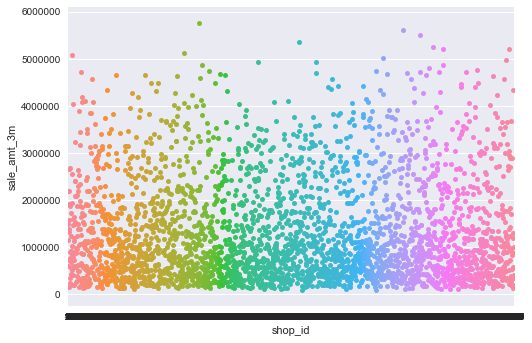

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.swarmplot(x=shops['shop_id'], y=data_sales_sum.groupby(['shop_id'])[['sale_amt_3m']].sum()['sale_amt_3m'])

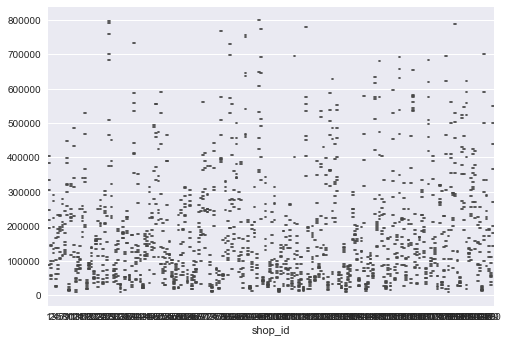

In [31]:
time_points = ['2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31']
sns.violinplot(x=shops['shop_id'][:200], y=shops_sales_amt_3m[:200], size=10, aspect=0.5)

In [31]:
def plot_shops(shops_data):
    plt.figure()
    plt.rc('figure', figsize=(10,7))
    
    x = range(1, 9)
    time_points = ['2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31']
    
    stable = []
    if isinstance(shops_data[0], list) == True:
        for i in range(len(shops_data)):
            if (max(shops_data[i]) - min(shops_data[i])) <= 200000:
                plt.plot(x, shops_data[i], color='g')
            else:
                plt.plot(x, shops_data[i], color='b')
        plt.title('shops sale_amt_3m trend', fontsize=16, y=1.05)
    else:
        mean = np.array(shops_data).mean()
        plt.plot([1, 8], [mean, mean], 'r', linestyle='--')
        plt.plot(x, shops_data)
        plt.title('shop sale_amt_3m trend', fontsize=16, y=1.05)
        
    plt.xlabel('time to 90 days', fontsize=14)
    plt.ylabel('sale_amt_3m(yuan)', fontsize=14)
    plt.xticks(x, time_points, rotation=10, fontsize=10)
    
    plt.show() 

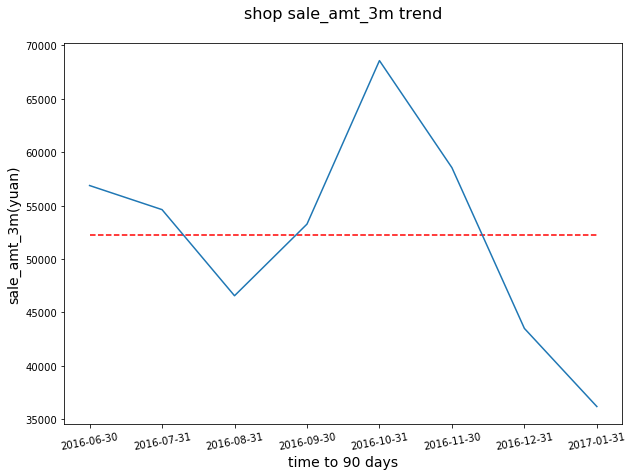

In [41]:
plot_shops(shops_sales_amt_3m[1148])

In [156]:
stable = {}
for i in range(len(shops_sales_amt_3m)):
    if max(shops_sales_amt_3m[i]) - min(shops_sales_amt_3m[i]) <= 20000:
        stable[i+1] = sum(shops_sales_amt_3m[i])/len(shops_sales_amt_3m[i])
print(len(stable))
stable11

161


{19: 84387.23250000001,
 37: 50769.36875,
 43: 24461.61375,
 74: 17491.668749999997,
 91: 22338.37125,
 99: 30332.742499999997,
 104: 14356.78625,
 115: 17927.8525,
 143: 22656.3925,
 195: 18161.003750000003,
 204: 39012.9625,
 215: 28950.628750000003,
 233: 14465.572499999998,
 320: 45861.96875,
 324: 19897.052499999998,
 345: 16833.3275,
 360: 26341.551250000004,
 366: 23991.935,
 374: 16781.83125,
 376: 19477.612500000003,
 381: 16596.537500000002,
 447: 12054.815,
 457: 19532.56125,
 468: 19562.853750000002,
 501: 28810.531249999996,
 509: 60607.45875,
 518: 59590.18375,
 524: 24077.87625,
 564: 29887.76625,
 577: 21819.28125,
 593: 23579.38125,
 599: 21882.23875,
 609: 28498.542500000003,
 610: 15187.97375,
 617: 27549.21875,
 674: 20913.64,
 706: 24896.4375,
 727: 17652.635000000002,
 740: 16713.42875,
 767: 21397.05125,
 780: 31833.14,
 805: 20758.83625,
 836: 35998.92,
 879: 20854.38875,
 900: 23692.949999999997,
 922: 19253.427499999998,
 933: 22160.481249999997,
 948: 73289.2

In [99]:
shops_sales_amt_3m

[54088.5, 46507.8, 51021.65, 51685.72, 57422.88, 43916.86, 44168.86, 57342.68]

In [157]:
submission_rm_knn = pd.read_csv('submission_rm_knn.csv', header=None)
submission_rm_knn_partmean = submission_rm_knn.copy()
submission_rm_knn_partmean.columns = ['shop_id', 'sale_amt_3m']

for i in stable.keys():
    submission_rm_knn_partmean['sale_amt_3m'][i-1] = stable[i]
# # submission_rm_knn_partmean.iloc[36]
# print(submission_rm_knn_partmean)
submission_rm_knn_partmean.to_csv('submission_rm_knn_partmean.csv', index=None, header=False)

D:\Anaconda\envs\py3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**提交三：**将KNN最好的结果，部分数据改为平均值，wmae score为**0.582128**

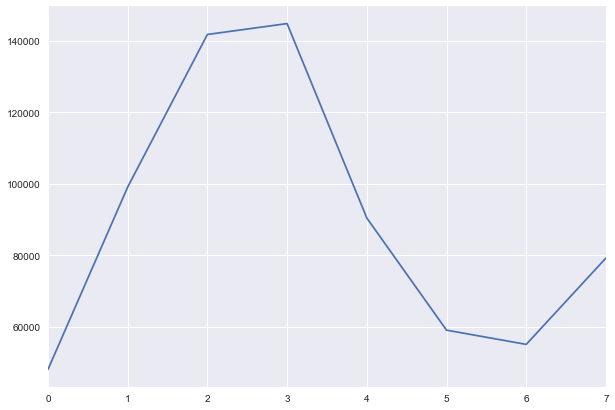

In [158]:
data_sales_sum[data_sales_sum['shop_id']==2].sort_values(by='dt').reset_index(drop=True)['sale_amt_3m'].plot(kind='line')

# 6、预测

## 6.1 平均值预测

In [28]:
def wmae(ground_truth, predictions):
    return abs(predictions-ground_truth).sum()/float(ground_truth.sum())

from sklearn.metrics import make_scorer
loss  = make_scorer(wmae, greater_is_better=False)

In [29]:
mean_sales = data_sales_sum.groupby(['shop_id'])[['sale_amt_3m']].mean().reset_index(drop=True)['sale_amt_3m']
mean_wmae_train = wmae(labels_train[:1000], mean_sales)
mean_wmae_val = wmae(labels_val, mean_sales)
print('predict first 1000 train data with mean sales_amt:{:.4f}'.format(mean_wmae_train))
print('predict val data with mean sales_amt:{:.4f}'.format(mean_wmae_val))

sales_last = data_sales_sum[data_sales_sum['dt']=='2016-12-31'].groupby('shop_id')[['sale_amt_3m']].sum()['sale_amt_3m'].reset_index(drop=True)
wmae_last_month = wmae(labels_val, sales_last)
print('predict val data with last month sales_amt:{:.4f}'.format(wmae_last_month))

predict first 1000 train data with mean sales_amt:0.2692
predict val data with mean sales_amt:0.3685
predict val data with last month sales_amt:0.2548


## 6.2 预测

In [30]:
def train_predict(learner, sample_size, X_train, y_train, X_val, y_val):
#     print("{} trained on {} samples...".format(learner.__class__.__name__, sample_size))
    results = {}
    
    start = time()
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time()
    results['train time'] = end - start
    
    start = time()
    predictions_train = learner.predict(X_train[:1000])
    predictions_val = learner.predict(X_val)
    end = time()
    results['prediction time'] = end - start
    
    results['train_wmae'] = abs(predictions_train-y_train[:1000]).sum()/float(y_train[:1000].sum())
    results['val_wmae'] = abs(predictions_val-y_val).sum()/float(y_val.sum())
#     print(results)
    return results

In [31]:
def plot_result(results, mean_wmae_train_1, mean_wmae_val):
    import matplotlib.patches as mpatches
    fig, ax = plt.subplots(2, 2, figsize = (9,7))

    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train time', 'train_wmae', 'prediction time', 'val_wmae']):
            for i in np.arange(3):

                ax[int(j/2), j%2].bar(i+k*bar_width+0.15, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[int(j/2), j%2].set_xticks([0.45, 1.45, 2.45])
                ax[int(j/2), j%2].set_xticklabels(["1%", "10%", "100%"])
                ax[int(j/2), j%2].set_xlabel("Training Set Size")
                ax[int(j/2), j%2].set_xlim((-0.1, 3.0))
    
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("wmae Score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("wmae Score")
    
    ax[0, 0].set_title("Time on Training Subset")
    ax[0, 1].set_title("wmae on Training Subset")
    ax[1, 0].set_title("Time on Predicting subset")
    ax[1, 1].set_title("wmae Score on Validation Set")
    
    ax[0, 1].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    
    ax[0, 1].axhline(y = mean_wmae_train_1, xmin = 0, xmax = 1.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = mean_wmae_val, xmin = 0, xmax = 1.0, linewidth = 1, color = 'k', linestyle = 'dashed')

    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-0.15, 2.6), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 14)
    
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

### 6.2.1 Ride、GradientBoostingRegressor、AdaBoostRegressor

#### 6.2.1.1 建模预测

RandomForestRegressor trained on 120 samples...
RandomForestRegressor trained on 1200 samples...
RandomForestRegressor trained on 12000 samples...
GradientBoostingRegressor trained on 120 samples...
GradientBoostingRegressor trained on 1200 samples...
GradientBoostingRegressor trained on 12000 samples...
AdaBoostRegressor trained on 120 samples...
AdaBoostRegressor trained on 1200 samples...
AdaBoostRegressor trained on 12000 samples...
3 model train & pred time:203.4140s


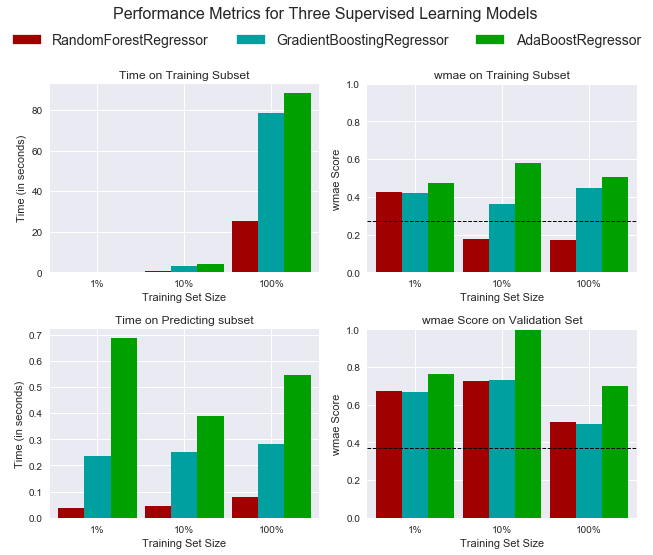

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

reg_A = RandomForestRegressor(random_state=0)
reg_B = GradientBoostingRegressor(random_state=0)
reg_C = AdaBoostRegressor(random_state=0)

samples_1 = int(0.01*len(labels_train))
samples_10 = int(0.1*len(labels_train))
samples_100 = len(labels_train)

start = time()
results_1 = {}
for reg in [reg_A, reg_B, reg_C]:
    reg_name = reg.__class__.__name__
    results_1[reg_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results_1[reg_name][i] = train_predict(reg, samples, features_train, labels_train, features_val, labels_val)
end = time()
print('3 model train & pred time:{:.4f}s'.format(end-start))
        
plot_result(results_1, mean_wmae_train, mean_wmae_val)

#### 6.2.1.2 调参

In [178]:
print(results_1['RandomForestRegressor'][2]['val_wmae'])
print(results_1['GradientBoostingRegressor'][2]['val_wmae'])

0.5102940480429604
0.49994568909398635


In [585]:
from sklearn.model_selection import GridSearchCV

reg = GradientBoostingRegressor(random_state=0)

params = {'learning_rate':[0.1, 0.2, 0.3], 'n_estimators':[90, 100, 110, 120]}

gd_search = GridSearchCV(reg, params, scoring=loss, n_jobs=-1)

gd_search.fit(features_train, labels_train)

best_reg = gd_search.best_estimator_

print(gd_search.best_params_)

{'learning_rate': 0.3, 'n_estimators': 120}


In [201]:
from sklearn.ensemble import GradientBoostingRegressor

reg_GBRs = []
for learning_rate in [0.3, 0.35, 0.4]:
    for n_estimators in [100, 120, 140]:
        reg_GBRs.append(GradientBoostingRegressor(random_state=0, learning_rate=learning_rate, n_estimators=n_estimators))

samples_1 = int(0.01*len(labels_train))
samples_10 = int(0.1*len(labels_train))
samples_100 = len(labels_train)

start = time()
results_GBRs = {}
n = 1
for reg in reg_GBRs:
    print("{} {} trained on {} samples...".format(reg.__class__.__name__, n, samples_100))
    results_GBRs['{}'.format(n)] = train_predict(reg, samples_100, features_train, labels_train, features_val, labels_val)
    n += 1
end = time()
print('KNN hand_search time:{:.4f}s'.format(end-start))

print(results_GBRs)

GradientBoostingRegressor 1 trained on 12000 samples...
GradientBoostingRegressor trained on 12000 samples...
GradientBoostingRegressor 2 trained on 12000 samples...
GradientBoostingRegressor trained on 12000 samples...
GradientBoostingRegressor 3 trained on 12000 samples...
GradientBoostingRegressor trained on 12000 samples...
GradientBoostingRegressor 4 trained on 12000 samples...
GradientBoostingRegressor trained on 12000 samples...
GradientBoostingRegressor 5 trained on 12000 samples...
GradientBoostingRegressor trained on 12000 samples...
GradientBoostingRegressor 6 trained on 12000 samples...
GradientBoostingRegressor trained on 12000 samples...
GradientBoostingRegressor 7 trained on 12000 samples...
GradientBoostingRegressor trained on 12000 samples...
GradientBoostingRegressor 8 trained on 12000 samples...
GradientBoostingRegressor trained on 12000 samples...
GradientBoostingRegressor 9 trained on 12000 samples...
GradientBoostingRegressor trained on 12000 samples...
KNN hand_s

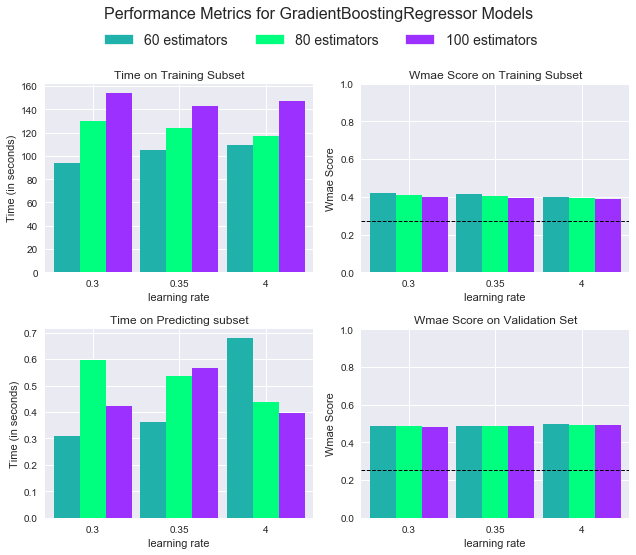

In [203]:
plot_result_GBRs(results_GBRs,mean_wmae_train, wmae_last_month)

In [202]:
def plot_result_GBRs(results, mean_wmae_train, wmae_last_month):
    import matplotlib.patches as mpatches
    fig, ax = plt.subplots(2, 2, figsize = (9,7))

    bar_width = 0.3
    colors = [ '#20B2AA', '#00FF7F', '#9B30FF']
    
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train time', 'train_wmae', 'prediction time', 'val_wmae']):

            ax[int(j/2), j%2].bar(k*bar_width+0.15+(k//3)/10, results[learner][metric], width = bar_width, color = colors[k%3])
            ax[int(j/2), j%2].set_xticks([0.45, 1.45, 2.45])
            ax[int(j/2), j%2].set_xticklabels(["0.3", "0.35", "4"])
            ax[int(j/2), j%2].set_xlabel("learning rate")
            ax[int(j/2), j%2].set_xlim((-0.1, 3.0))
    
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Wmae Score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Wmae Score")
    
    ax[0, 0].set_title("Time on Training Subset")
    ax[0, 1].set_title("Wmae Score on Training Subset")
    ax[1, 0].set_title("Time on Predicting subset")
    ax[1, 1].set_title("Wmae Score on Validation Set")
    
    ax[0, 1].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    
    ax[0, 1].axhline(y = mean_wmae_train, xmin = 0, xmax = 1.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = wmae_last_month, xmin = 0, xmax = 1.0, linewidth = 1, color = 'k', linestyle = 'dashed')

    patches = []
    n_estimators = [60, 80, 100]
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i%3], label = '{} estimators'.format(n_estimators[i%3])))
    plt.legend(handles = patches[:3], bbox_to_anchor = (-0.15, 2.6), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 14)
    
    plt.suptitle("Performance Metrics for GradientBoostingRegressor Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

In [586]:
best_predictions = best_reg.predict(features_val)
best_wmae = wmae(labels_val, best_predictions)
print(best_wmae)

0.51543770711121


In [657]:
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import randint as sp_randint

strat = time()
reg = GradientBoostingRegressor(random_state=0)

params_rm = {'learning_rate':[0.01,0.1,0.3,0.5], 'n_estimators':sp_randint(90,130)}

rm_search = RandomizedSearchCV(reg, param_distributions=params_rm, scoring=loss, n_iter=20, n_jobs=-1)

rm_search.fit(features_train, labels_train)

best_reg_rm = rm_search.best_estimator_
end = time()
print('random search time:{:.4f}s'.format(end-start))
print(rm_search.best_params_)

best_predictions = best_reg.predict(features_val)
best_wmae = wmae(labels_val, best_predictions)
print(best_wmae)

random search time:46450.7871s
{'learning_rate': 0.5, 'n_estimators': 128}
0.51543770711121


**GradientBoostingRegressor 在val上为0.51543770711121**

In [ ]:
reg_KNNs = []
for neighbors in [3, 4, 5]:
    for p in [1, 2, 3]:
        for algo in ['ball_tree','kd_tree','brute']:
            reg_KNNs.append(KNeighborsRegressor(n_jobs=-1, n_neighbors=neighbors, p=p, algorithm=algo))

samples_1 = int(0.01*len(labels_train))
samples_10 = int(0.1*len(labels_train))
samples_100 = len(labels_train)

start = time()
results_KNNs = {}
n = 1
for reg in reg_KNNs:
    results_KNNs['{}'.format(n)] = train_predict(reg, samples_100, features_train, labels_train, features_val, labels_val)
    print("{} {} trained on {} samples...".format(reg.__class__.__name__, n, sample_100))
    n += 1
end = time()
print('KNN hand_search time:{:.4f}s'.format(end-start))
        

#### 6.2.1.3生成最终结果

In [686]:
submission_rm_gbr = pd.DataFrame()
submission_rm_gbr['shop_id'] = shops['shop_id']
submission_rm_gbr['pred_amt'] = best_predictions
submission_rm_gbr = submission_rm_gbr.groupby('shop_id')[['pred_amt']].mean()
submission_rm_gbr.to_csv('submission_rm_gbr.csv', header=False)
submission_rm_gbr

      shop_id       pred_amt
0           1  170312.078142
1           2   49249.323500
2           3  163876.157307
3           4   85151.760002
4           5   61404.215936
5           6  114690.333135
6           7   78626.273434
7           8  142780.393861
8           9  238775.702435
9          10   61404.215936
10         11  159550.498188
11         12   84563.684268
12         13   53600.226268
13         14   45877.512300
14         15   92655.417929
15         16   96684.153847
16         17  106447.667504
17         18   61404.215936
18         19   53464.804583
19         20   91070.873590
20         21   61404.215936
21         22  108349.612822
22         23   79866.985329
23         24  111167.147785
24         25  118322.067727
25         26  123278.218948
26         27   89271.608301
27         28  159840.388074
28         29  116835.040352
29         30   84361.091615
...       ...            ...
2970     2971  325359.974888
2971     2972  157124.645954
2972     2973 

,pred_amt
shop_id,
1,170312.078142
2,49249.323500
3,163876.157307
4,85151.760002
5,61404.215936
6,114690.333135
7,78626.273434
8,142780.393861
9,238775.702435


### 6.2.2 KNeighborsRegressor、LinearRegression、SVR

#### 6.2.2.1 建模预测

KNeighborsRegressor trained on 120 samples...
KNeighborsRegressor trained on 1200 samples...
KNeighborsRegressor trained on 12000 samples...
DecisionTreeRegressor trained on 120 samples...
DecisionTreeRegressor trained on 1200 samples...
DecisionTreeRegressor trained on 12000 samples...
SVR trained on 120 samples...
SVR trained on 1200 samples...
SVR trained on 12000 samples...
3 model train & pred time:1069.2257s


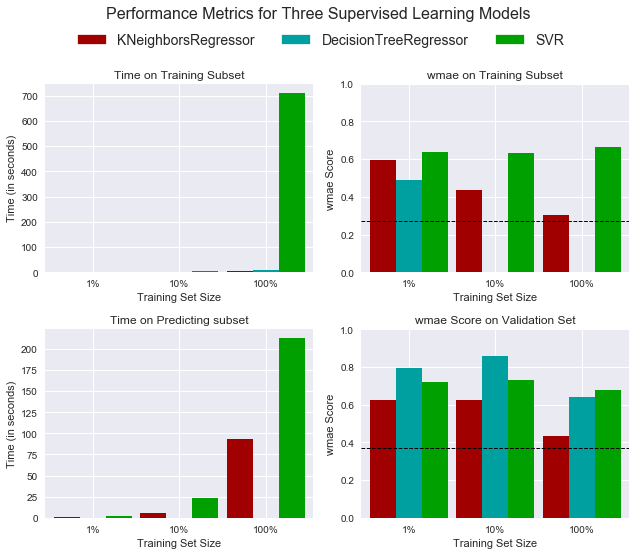

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

reg_D = KNeighborsRegressor(n_jobs=-1)
reg_E = DecisionTreeRegressor()
reg_F = SVR()

samples_1 = int(0.01*len(labels_train))
samples_10 = int(0.1*len(labels_train))
samples_100 = len(labels_train)

start = time()
results_2 = {}
for reg in [reg_D, reg_E, reg_F]:
    reg_name = reg.__class__.__name__
    results_2[reg_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results_2[reg_name][i] = train_predict(reg, samples, features_train, labels_train, features_val, labels_val)
end = time()
print('3 model train & pred time:{:.4f}s'.format(end-start))
        
plot_result(results_2, mean_wmae_train, mean_wmae_val)

#### 6.2.2.2 调参

In [51]:
results_2['KNeighborsRegressor'][2]['val_wmae']

0.43115474115575003

In [ ]:
from sklearn.model_selection import GridSearchCV

start = time()
reg_2 = KNeighborsRegressor(n_jobs=-1)

params = {'n_neighbors':[2,3,4], 'p':[1,2,3]}

gd_search_KNN = GridSearchCV(reg_2, params, scoring=loss, n_jobs=-1)

gd_search_KNN.fit(features_train, labels_train)

best_reg_KNN = gd_search_KNN.best_estimator_

print(gd_search_KNN.best_params_)


best_predictions_KNN = best_reg_KNN.predict(features_val)
best_wmae__KNN = wmae(labels_val, best_predictions_KNN)
print(best_wmae_KNN)
end = time()
print('gs time:{:.4f}'.format(end-start))

In [45]:
from sklearn.neighbors import KNeighborsRegressor

reg_KNNs = []
for neighbors in [3, 4, 5]:
    for p in [2, 3, 4]:
        reg_KNNs.append(KNeighborsRegressor(n_jobs=-1, n_neighbors=neighbors, p=p))

samples_1 = int(0.01*len(labels_train))
samples_10 = int(0.1*len(labels_train))
samples_100 = len(labels_train)

start = time()
results_KNNs = {}
n = 1
for reg in reg_KNNs:
    print("{} {} trained on {} samples...".format(reg.__class__.__name__, n, samples_100))
    results_KNNs['{}'.format(n)] = train_predict(reg, samples_100, features_train, labels_train, features_val, labels_val)
    n += 1
end = time()
print('KNN hand_search time:{:.4f}s'.format(end-start))

print(results_KNNs)
# plot_result(results_2, mean_wmae_train, mean_wmae_val)

KNeighborsRegressor 1 trained on 12000 samples...
KNeighborsRegressor trained on 12000 samples...
KNeighborsRegressor 2 trained on 12000 samples...
KNeighborsRegressor trained on 12000 samples...
KNeighborsRegressor 3 trained on 12000 samples...
KNeighborsRegressor trained on 12000 samples...
KNeighborsRegressor 4 trained on 12000 samples...
KNeighborsRegressor trained on 12000 samples...
KNeighborsRegressor 5 trained on 12000 samples...
KNeighborsRegressor trained on 12000 samples...
KNeighborsRegressor 6 trained on 12000 samples...
KNeighborsRegressor trained on 12000 samples...
KNeighborsRegressor 7 trained on 12000 samples...
KNeighborsRegressor trained on 12000 samples...
KNeighborsRegressor 8 trained on 12000 samples...
KNeighborsRegressor trained on 12000 samples...
KNeighborsRegressor 9 trained on 12000 samples...
KNeighborsRegressor trained on 12000 samples...
KNN hand_search time:2104.9163s
{'1': {'train time': 4.7854108810424805, 'prediction time': 39.202868700027466, 'train

In [159]:
# results_KNNs_aft = {}
# for i in range(len(results_KNNs)):
#     if (i+3)%3 == 0:
#         results_KNNs_aft[int((i+3)/3)] = results_KNNs['{}'.format(i+1)]
# print(results_KNNs_aft)

# plot_result_KNNs(results_KNNs_aft, mean_wmae_train, wmae_last_month)
plot_result_KNNs(results_KNNs, mean_wmae_train, wmae_last_month)

NameError: name 'results_KNNs' is not defined

In [183]:
def plot_result_KNNs(results, mean_wmae_train, wmae_last_month):
    import matplotlib.patches as mpatches
    fig, ax = plt.subplots(2, 2, figsize = (9,7))

    bar_width = 0.3
    colors = [ '#20B2AA', '#00FF7F', '#9B30FF']
    
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train time', 'train_wmae', 'prediction time', 'val_wmae']):

            ax[int(j/2), j%2].bar(k*bar_width+0.15+(k//3)/10, results[learner][metric], width = bar_width, color = colors[k%3])
            ax[int(j/2), j%2].set_xticks([0.45, 1.45, 2.45])
            ax[int(j/2), j%2].set_xticklabels(["3", "4", "5"])
            ax[int(j/2), j%2].set_xlabel("n neighbors")
            ax[int(j/2), j%2].set_xlim((-0.1, 3.0))
    
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Wmae Score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Wmae Score")
    
    ax[0, 0].set_title("Time on Training Subset")
    ax[0, 1].set_title("Wmae Score on Training Subset")
    ax[1, 0].set_title("Time on Predicting subset")
    ax[1, 1].set_title("Wmae Score on Validation Set")
    
    ax[0, 1].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    
    ax[0, 1].axhline(y = mean_wmae_train, xmin = 0, xmax = 1.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = wmae_last_month, xmin = 0, xmax = 1.0, linewidth = 1, color = 'k', linestyle = 'dashed')

    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i%3], label = '{} Minkowski distance'.format(learner)))
    plt.legend(handles = patches[:3], bbox_to_anchor = (-0.15, 2.6), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 14)
    
    plt.suptitle("Performance Metrics for KNeighborsRegressor Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

#### 6.2.2.3 预测并生成最终结果

In [145]:
reg_KNN_best = KNeighborsRegressor(n_jobs=-1, n_neighbors=3, p=3)
reg_KNN_best.fit(features_train, labels_train)
predictions_KNN_best = reg_KNN_best.predict(features_val)

wmae(labels_val, predictions_KNN_best)

0.3965415249333668

In [146]:
submission_rm_knn = pd.DataFrame()
submission_rm_knn['shop_id'] = shops['shop_id']
submission_rm_knn['pred_amt'] = predictions_KNN_best
submission_rm_knn = submission_rm_knn.groupby('shop_id')[['pred_amt']].mean()
submission_rm_knn.to_csv('submission_rm_knn.csv', header=False)
submission_rm_knn

,pred_amt
shop_id,
1,312540.603333
2,68154.796667
3,221430.143333
4,24886.910000
5,109928.586667
6,142601.186667
7,142257.460000
8,136671.093333
9,335889.716667


**提交一** 6181111为**0.786665。**     

 **提交二：**KNN 为**0.582138**（val上为0.3965415249333668）

### 6.2.3 DecisionTreeRegressor、RandomForestRegressor、SGDRegressor

#### 6.2.4.1 建模

LinearRegression trained on 120 samples...
LinearRegression trained on 1200 samples...
LinearRegression trained on 12000 samples...
Ridge trained on 120 samples...
Ridge trained on 1200 samples...
Ridge trained on 12000 samples...
SGDRegressor trained on 120 samples...
SGDRegressor trained on 1200 samples...
SGDRegressor trained on 12000 samples...
3 model train & pred time:28.8052s


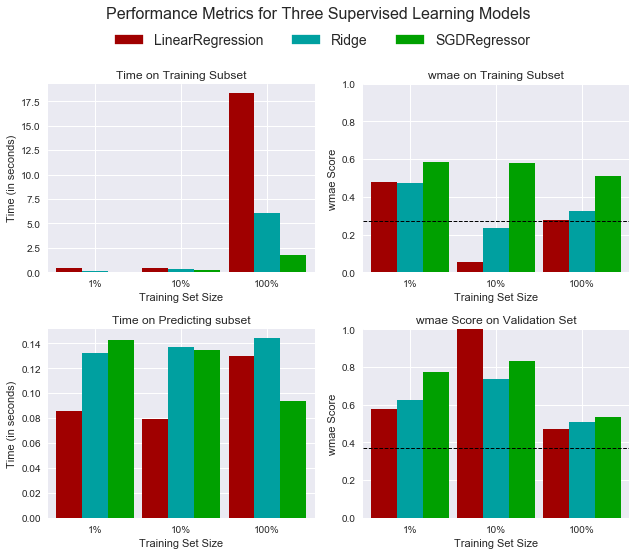

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor

reg_G = LinearRegression()
reg_H = Ridge(random_state=0)
reg_I = SGDRegressor(random_state=0)

samples_1 = int(0.01*len(labels_train))
samples_10 = int(0.1*len(labels_train))
samples_100 = len(labels_train)

start = time()
results_3 = {}
for reg in [reg_G, reg_H, reg_I]:
    reg_name = reg.__class__.__name__
    results_3[reg_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results_3[reg_name][i] = train_predict(reg, samples, features_train, labels_train, features_val, labels_val)
end = time()
print('3 model train & pred time:{:.4f}s'.format(end-start))
        
plot_result(results_3, mean_wmae_train, mean_wmae_val)

#### 6.2.4.2调参

In [43]:
print(results_3['LinearRegression'][2]['val_wmae'])

0.4719855898623297


[LinearRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)可调参数有限 

In [ ]:
from sklearn.linear_model import LinearRegression

reg_LineReg = []
for neighbors in [3, 4, 5]:
    for p in [2, 3, 4]:
        reg_LineReg.append(LinearRegression(n_jobs=-1, n_neighbors=neighbors, p=p))

samples_1 = int(0.01*len(labels_train))
samples_10 = int(0.1*len(labels_train))
samples_100 = len(labels_train)

start = time()
results_KNNs = {}
n = 1
for reg in reg_KNNs:
    print("{} {} trained on {} samples...".format(reg.__class__.__name__, n, samples_100))
    results_KNNs['{}'.format(n)] = train_predict(reg, samples_100, features_train, labels_train, features_val, labels_val)
    n += 1
end = time()
print('KNN hand_search time:{:.4f}s'.format(end-start))

print(results_KNNs)
# plot_result(results_2, mean_wmae_train, mean_wmae_val)

### 6.2.4 ElasticNet、Lasso、BayesianRidge

#### 6.2.4.1 建模

ElasticNet trained on 120 samples...
ElasticNet trained on 1200 samples...
ElasticNet trained on 12000 samples...
Lasso trained on 120 samples...
Lasso trained on 1200 samples...


D:\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso trained on 12000 samples...
BayesianRidge trained on 120 samples...
BayesianRidge trained on 1200 samples...
BayesianRidge trained on 12000 samples...
3 model train & pred time:317.1071s


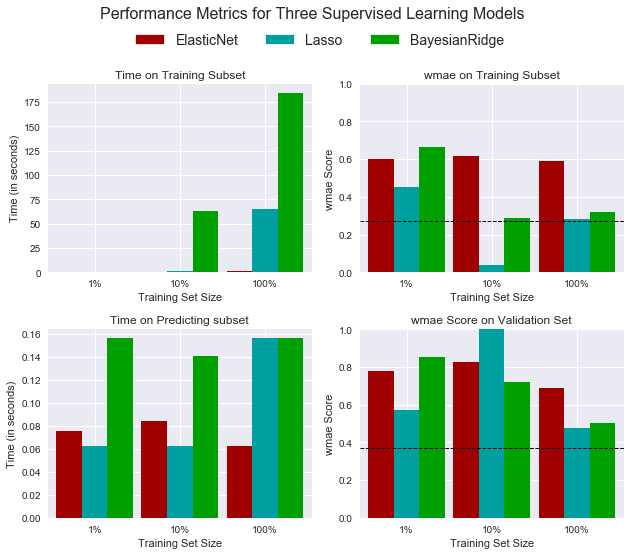

In [44]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge

reg_G = ElasticNet(random_state=0)
reg_H = Lasso(random_state=0)
reg_I = BayesianRidge()

samples_1 = int(0.01*len(labels_train))
samples_10 = int(0.1*len(labels_train))
samples_100 = len(labels_train)

start = time()
results_4 = {}
for reg in [reg_G, reg_H, reg_I]:
    reg_name = reg.__class__.__name__
    results_4[reg_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results_4[reg_name][i] = train_predict(reg, samples, features_train, labels_train, features_val, labels_val)
end = time()
print('3 model train & pred time:{:.4f}s'.format(end-start))
        
plot_result(results_4, mean_wmae_train, mean_wmae_val)

#### 6.2.4.2调参

In [45]:
print(results_4['Lasso'][2]['val_wmae'])

0.47467878558003196


In [ ]:
from sklearn.linear_model import Lasso

reg_Lassos = []
for neighbors in [3, 4, 5]:
    for p in [2, 3, 4]:
        reg_LineReg.append(LinearRegression(n_jobs=-1, n_neighbors=neighbors, p=p))

samples_1 = int(0.01*len(labels_train))
samples_10 = int(0.1*len(labels_train))
samples_100 = len(labels_train)

start = time()
results_KNNs = {}
n = 1
for reg in reg_KNNs:
    print("{} {} trained on {} samples...".format(reg.__class__.__name__, n, samples_100))
    results_KNNs['{}'.format(n)] = train_predict(reg, samples_100, features_train, labels_train, features_val, labels_val)
    n += 1
end = time()
print('KNN hand_search time:{:.4f}s'.format(end-start))

print(results_KNNs)
# plot_result(results_2, mean_wmae_train, mean_wmae_val)

### 6.2.5 KernelRidge、GaussianProcessRegressor、LogisticRegression

In [91]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LogisticRegression

reg_J = KernelRidge()
reg_K = GaussianProcessRegressor(random_state=0)
reg_L = LogisticRegression(random_state=0)

samples_1 = int(0.01*len(labels_train))
samples_10 = int(0.1*len(labels_train))
samples_100 = len(labels_train)

start = time()
results_5 = {}
for reg in [reg_J, reg_K, reg_L]:
    reg_name = reg.__class__.__name__
    results_5[reg_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results_5[reg_name][i] = train_predict(reg, samples, features_train, labels_train, features_val, labels_val)
end = time()
print('3 model train & pred time:{:.4f}s'.format(end-start))
        
plot_result(results_5, mean_wmae_train, mean_wmae_val)

KernelRidge trained on 120 samples...
KernelRidge trained on 1200 samples...
KernelRidge trained on 12000 samples...
GaussianProcessRegressor trained on 120 samples...
GaussianProcessRegressor trained on 1200 samples...
GaussianProcessRegressor trained on 12000 samples...
LogisticRegression trained on 120 samples...


ValueError: Unknown label type: 'continuous'

In [92]:
results_5

{'GaussianProcessRegressor': {0: {'prediction time': 2.1912155151367188,
   'train time': 0.14480137825012207,
   'train_wmae': 0.5524657242455374,
   'val_wmae': 0.6316870455836454},
  1: {'prediction time': 18.518120527267456,
   'train time': 5.9116432666778564,
   'train_wmae': 5.456484052706382e-10,
   'val_wmae': 0.7156609200164306},
  2: {'prediction time': 213.15738081932068,
   'train time': 692.8979411125183,
   'train_wmae': 1.8622084095272705e-07,
   'val_wmae': 1.0718283528776995}},
 'KernelRidge': {0: {'prediction time': 0.1020057201385498,
   'train time': 0.014000892639160156,
   'train_wmae': 0.5113082129547578,
   'val_wmae': 0.6792305639735886},
  1: {'prediction time': 0.40560078620910645,
   'train time': 0.22060728073120117,
   'train_wmae': 0.2454915107442669,
   'val_wmae': 0.7716078899351553},
  2: {'prediction time': 5.732844114303589,
   'train time': 28.271626234054565,
   'train_wmae': 0.32378264044375493,
   'val_wmae': 0.4971370032757313}},
 'LogisticRegr

### 6.2.6 Voting（KNN、Lasso、LinearRegressor）

In [163]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

reg_vote1 = KNeighborsRegressor(n_jobs=-1, n_neighbors=3, p=3)
reg_vote2 = Lasso(random_state=0)
reg_vote3 = LinearRegression()

start = time()
reg_vote1.fit(features_train, labels_train)
pred_vote1 = reg_vote1.predict(features_val)
end = time()
print('reg_vote1 train and pred time: {:.4f}s'.format(end - start))

start = time()
reg_vote2.fit(features_train, labels_train)
pred_vote2 = reg_vote2.predict(features_val)
end = time()
print('reg_vote2 train and pred time: {:.4f}s'.format(end - start))

start = time()
reg_vote3.fit(features_train, labels_train)
pred_vote3 = reg_vote3.predict(features_val)
end = time()
print('reg_vote3 train and pred time: {:.4f}s'.format(end - start))

reg_vote1 train and pred time: 108.4592s


D:\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


reg_vote2 train and pred time: 106.7625s
reg_vote3 train and pred time: 40.4703s


In [176]:
print('wmae KNN:{:.6f}'.format(wmae(labels_val, pred_vote1)))
print('wmae Lasso:{:.6f}'.format(wmae(labels_val, pred_vote2)))
print('wmae LineRegre:{:.6f}'.format(wmae(labels_val, pred_vote3)))

wmae KNN:0.396542
wmae Lasso:0.474679
wmae LineRegre:0.471986


In [177]:
pred_vote = 0.8*pred_vote1+0.1*pred_vote2+0.1*pred_vote3
wmae(labels_val, pred_vote)

0.39969736705641973

# 7、去商品类features预测

## 7.1 合并features_0

In [181]:
features_train_no_product = pd.concat([features_train_1_0, features_2_0, features_3_0, features_4_0]).reset_index(drop=True)
# labels_train, features_val_0, labels_val不用改变

## 7.2 特征优化

In [182]:
features_train_no_product = features_train_no_product.drop(['shop_id'], axis=1)
# features_train_no_product = features_train_no_product.apply(lambda x: np.log(x+1))
# columns_no_product = features_train_no_product.columns
# features_train_no_product[columns_no_product] = MinMaxScaler().fit_transform(features_train_no_product[columns_no_product])

features_val_no_product = features_val_0.drop(['shop_id'], axis=1)
# features_val_no_product = features_val_no_product.apply(lambda x: np.log(x+1))
# features_val_no_product[columns_no_product] = MinMaxScaler().fit_transform(features_val_no_product[columns_no_product])

## 7.3 预测

Ridge trained on 120 samples...
Ridge trained on 1200 samples...
Ridge trained on 12000 samples...
GradientBoostingRegressor trained on 120 samples...
GradientBoostingRegressor trained on 1200 samples...
GradientBoostingRegressor trained on 12000 samples...
KNeighborsRegressor trained on 120 samples...
KNeighborsRegressor trained on 1200 samples...
KNeighborsRegressor trained on 12000 samples...
3 model train & pred with no product features time:1.6810s


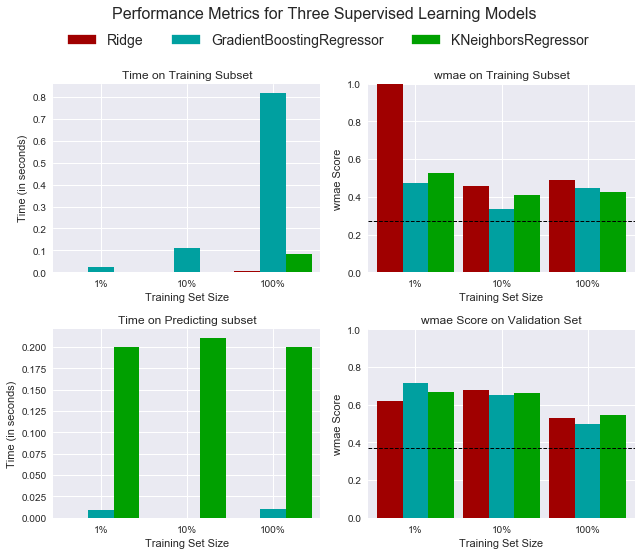

In [183]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

reg_A = Ridge(random_state=0)
reg_B = GradientBoostingRegressor(random_state=0)
reg_D = KNeighborsRegressor(n_jobs=-1)

samples_1 = int(0.01*len(labels_train))
samples_10 = int(0.1*len(labels_train))
samples_100 = len(labels_train)

start = time()
results_no_product = {}
for reg in [reg_A, reg_B, reg_D]:
    reg_name = reg.__class__.__name__
    results_no_product[reg_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results_no_product[reg_name][i] = train_predict(reg, samples, features_train_no_product, labels_train, features_val_no_product, labels_val)
end = time()
print('3 model train & pred with no product features time:{:.4f}s'.format(end-start))
        
plot_result(results_no_product, mean_wmae_train, mean_wmae_val)

**舍弃掉product特征，wmae score会下降的比较厉害**